In [1]:
import numpy as np
import skimage.io
import skimage.measure
#from scipy.ndimage.measurements import label
import skimage.external.tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
def im_prep(str_pred, str_mask, win_size):
    prediction = skimage.io.imread(str_pred)
    mask = skimage.io.imread(str_mask)
    
    mask = mask[win_size:-win_size, win_size:-win_size]
    mask = np.pad(mask, (win_size, win_size), 'constant')
    prediction = np.pad(prediction, (win_size, win_size), 'constant')
    
    return prediction, mask


In [3]:
wshed_pred, wshed_mask = im_prep('wshed_pred.tif', 'wshed_mask.tif', 15)

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,10]

In [ ]:
plt.imshow(wshed_pred)

In [ ]:
plt.imshow(wshed_mask)

In [ ]:
print('watershed mask max is: ', wshed_mask.max(), ' shape is: ', wshed_mask.shape)
print('watershed prediction max is: ', wshed_pred.max(), ' shape is: ', wshed_pred.shape)

In [ ]:
def dice_pixel_quick(pred_input, truth_input):
    
    pred = np.copy(pred_input)
    truth = np.copy(truth_input)
    
    pred[pred != 0] = 1
    truth[truth != 0] = 1    
    
    true_pos = 0
    false_pos = 0
    false_neg = 0
    
    if pred.shape != truth.shape:
        raise ValueError('shape of inputs need to match. Shape of prediction is: ', pred.shape, ' Shape of mask is: ', truth.shape)
    
    if((pred.sum() + truth.sum()) == 0):
        print('arrays are empty. Dice score is technically 1.0')
        return 1.0
    
    intersection = np.logical_and(pred, truth)

    dice_pixel = (2*intersection.sum() / (pred.sum() + truth.sum()))
    jaccard_pixel = dice_pixel/(2-dice_pixel)
    
#    for y,x in np.ndindex(wshed_pred.shape):
#        if((pred[y][x]==1) & (truth[y][x]==1)):
#            true_pos += 1
#        elif((pred[y][x]==1) & (truth[y][x]==0)):
#            false_pos += 1
#        elif((pred[y][x]==0) & (truth[y][x]==1)):
#            false_neg += 1
    
#    dice_pixel = (2*true_pos)/(2*true_pos + false_pos + false_neg)
    
    print('pixelwise dice/F1 index is: ', dice_pixel)
    print('pixelwise jaccard index is: ', jaccard_pixel)
#    return dice_pixel, jaccard_pixel

In [ ]:
dice_pixel_quick(wshed_pred, wshed_mask)

In [9]:
def calc_cropped_ious(crop_pred, crop_truth, threshold, iou_matrix):
    
    # for each unique cellID in the given mask...
    for n in np.unique(crop_truth):
        if n == 0: continue #excluding background
        
        # for each unique cellID in the given prediction...
        for m in np.unique(crop_pred):
            if m == 0: continue #excluding backgrond
            
            #calculate the intersection over union for 
            intersection = np.logical_and( crop_pred==m, crop_truth==n)
            union = np.logical_or( crop_pred==m, crop_truth==n)
        
            iou = np.sum(intersection) / np.sum(union)
        
            if iou > threshold:
                print('Hit!')
                iou_matrix[n-1][m-1] = 1


In [19]:
def gen_iou_matrix_quick(pred_input, truth_input, threshold, crop_size, im_size=2048):
        
    # copy inputs so original arrays are not modified
    pred = np.copy(pred_input)
    truth = np.copy(truth_input)
    
    # label ground truth masks, neccesary if not already tagged with cellID numbers
    truth = skimage.measure.label(truth, connectivity = 1)
    
    # create empty intersection over union matrix, with shape n(truth) by m(prediction)
    iou_matrix = np.zeros((truth.max(), pred.max()))
    
    crop_counter = 1
    
    # crop input images and calculate the iou's for the cells present
    for x in range(0, im_size, crop_size):
        for y in range(0, im_size, crop_size):
            
            print('crop # is: ', crop_counter)
            crop_counter+=1
            
            crop = np.zeros((crop_size, crop_size))
            crop_pred = pred[x:x+crop_size, y:y+crop_size]
            crop_truth = truth[x:x+crop_size, y:y+crop_size]
            
            plt.imshow(crop_pred)
            
            calc_cropped_ious(crop_pred, crop_truth, threshold, iou_matrix)
    
    print('sum is: ', np.sum(iou_matrix))
    
    return iou_matrix, pred.max(), truth.max()


In [20]:
def dice_jaccard_object(pred, truth, threshold=0.5, crop_size=256):
    
    iou_matrix, pred_max, truth_max = gen_iou_matrix_quick(pred, truth, threshold, crop_size=crop_size)
    iou_sum = np.sum(iou_matrix)
    dice_object = 2*iou_sum / (2*iou_sum + pred_max-iou_sum + truth_max-iou_sum)
    
    print('object-based dice/F1 score is: ', dice_object)
    return iou_matrix

crop # is:  1
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  2
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  3
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  4
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  5
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  6
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  7
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  8
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  9
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  10
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  11
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  12
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!

Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  80
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  81
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  82
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  83
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  84
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  85
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  86
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  87
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  88
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  89
Hit!
Hit!


Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  158
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  159
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  160
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  161
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  162
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  163
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  164
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  165
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  166
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
H

Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  231
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  232
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  233
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  234
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  235
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!


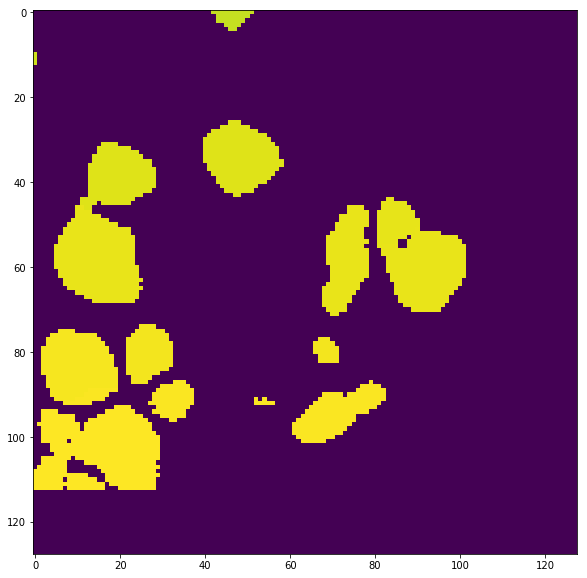

In [21]:
iou_matrix = dice_jaccard_object(wshed_pred, wshed_mask, crop_size=128)

crop # is:  1
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  2
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  3
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  4
Hit!
Hit!
Hit!
Hit!

Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  26
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  27
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  28
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!


Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  52
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  53
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!


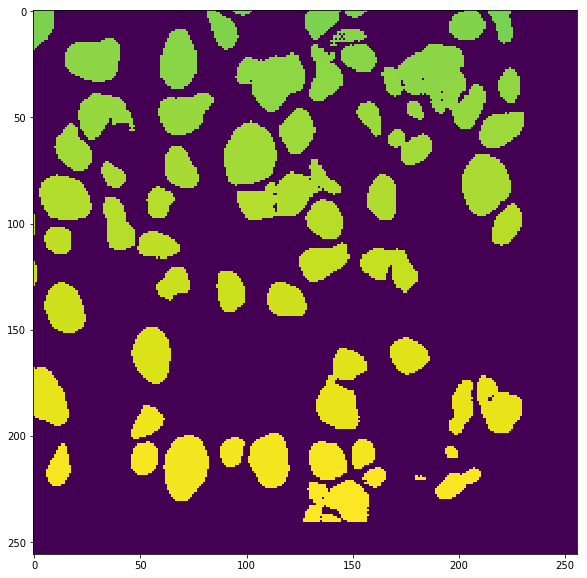

In [15]:
iou_matrix = dice_jaccard_object(wshed_pred, wshed_mask, crop_size=256)

In [ ]:
def merge_divide_count(pred, truth, threshold=0.05, crop_size=128):

crop # is:  1
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  2
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  3
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  4
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  5
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  6
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  7
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  8
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  9
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  10
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!

Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  65
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  66
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  67
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  68
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  69
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  70
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  71
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  72
Hit!
Hit!


Hit!
crop # is:  134
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  135
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  136
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  137
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  138
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  139
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  140
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  141
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  142
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
H

Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  201
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  202
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  203
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  204
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  205
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  206
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  207
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit

Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  249
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  250
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  251
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  252
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  253
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
Hit!
crop # is:  254
Hit!
Hit!

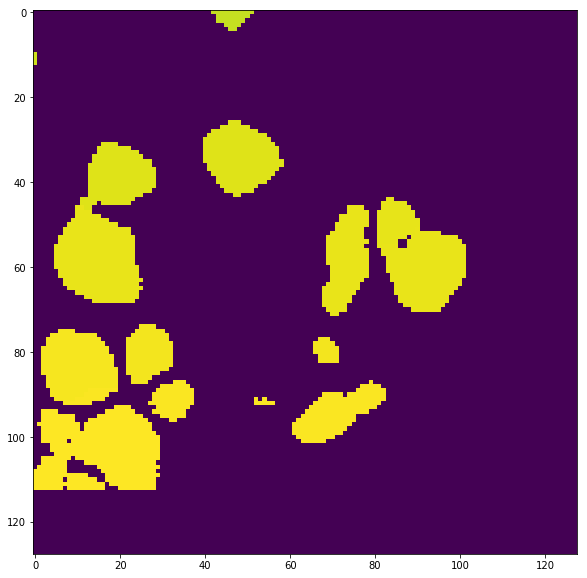

In [22]:
merge_div_iou_matrix = dice_jaccard_object(wshed_pred, wshed_mask, threshold=0.05, crop_size=128)

In [34]:
ioumtr = merge_div_iou_matrix

divided = 0

for n in range(0, ioumtr.shape[0]):
    counter = 0
    
    for m in range(0, ioumtr.shape[1]):
        
        if ioumtr[n,m] == 1:
            counter+=1
    
    if counter > 1:
        divided += (counter-1)
        
print(divided)

471


In [36]:
merged = 0

for m in range(0, ioumtr.shape[1]):
    counter = 0
    
    for n in range(1, ioumtr.shape[0]):
        
        if ioumtr[n,m] == 1:
            counter+=1
    
    if counter > 1:
        merged += (counter-1)
        
print(merged)

285
